## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 6.3: portion of the Galactic plane in 21cm continuum showing bremsstrahlung and synchrotron sources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


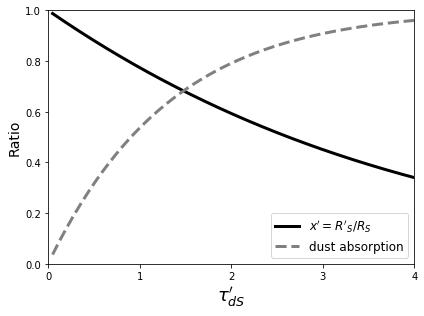

In [2]:
nsteps = 301
tau_min = 0.0
tau_max = 15.0
tau = np.linspace(tau_min, tau_max, nsteps)
x = np.zeros(nsteps)
for i in range(nsteps):
    func = lambda x : (x**2 - 2*x + 2) * np.exp(x) - 2 - tau[i]**3/3
    if i > 0:
        x0 = x[i-1]
    else:
        x0 = 0.00001
    x[i] = fsolve(func, x0)
y = x/tau

fig = plt.figure(figsize=(6,4.5))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,4)
ax.set_ylim(0,1)
ax.set_xlabel("$\\tau^\prime_{dS}$", fontsize=18)
ax.set_ylabel("Ratio", fontsize=14)
#ax.plot(x, y, 'b-', lw=3, label="$R'_S/R_S$")
#ax.plot(x, 1-y**3, 'r--', lw=3, label="dust absorption")
ax.plot(x, y, 'k-', lw=3, label="$x' = R'_S/R_S$")
ax.plot(x, 1-y**3, c='grey', ls='--', lw=3, label="dust absorption")
ax.legend(loc='lower right', fontsize=12)

x_labels = ['0','1','2','3','4']
x_loc = np.array([float(x) for x in x_labels])
ax.set_xticks(x_loc)
ax.set_xticklabels(x_labels)

plt.tight_layout()
plt.savefig('dustyHII.pdf')